# The Probability Density Function - Lab

## Introduction
In this lab, we will look at building visualizations known as **density plots** to estimate the probability density for a given set of data. 

## Objectives

You will be able to:

* Plot and interpret density plots and comment on the shape of the plot
* Estimate probabilities for continuous variables by using interpolation 


## Let's get started

Let's import the necessary libraries for this lab.

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd

## Import the data, and calculate the mean and the standard deviation

- Import the dataset 'weight-height.csv' as a pandas dataframe.

- Next, calculate the mean and standard deviation for weights and heights for men and women individually. You can simply use the pandas `.mean()` and `.std()` to do so.

**Hint**: Use your pandas dataframe subsetting skills like `loc()`, `iloc()`, and `groupby()`

In [2]:
data = pd.read_csv('weight-height.csv')
# male_df =  data.loc[data['Gender'] == 'Male']
# female_df =  data.loc[data['Gender'] == 'Female']
male_df =  data[data['Gender'] == 'Male']
female_df =  data[data['Gender'] == 'Female']

# Male Height mean: 69.02634590621737
# Male Height sd: 2.8633622286606517
# Male Weight mean: 187.0206206581929
# Male Weight sd: 19.781154516763813
# Female Height mean: 63.708773603424916
# Female Height sd: 2.696284015765056
# Female Weight mean: 135.8600930074687
# Female Weight sd: 19.022467805319007

data.groupby('Gender').agg(['mean', 'std'])

Height                Weight           
             mean       std        mean        std
Gender                                            
Female  63.708774  2.696284  135.860093  19.022468
Male    69.026346  2.863362  187.020621  19.781155

## Plot histograms (with densities on the y-axis) for male and female heights 

- Make sure to create overlapping plots
- Use binsize = 10, set alpha level so that overlap can be visualized

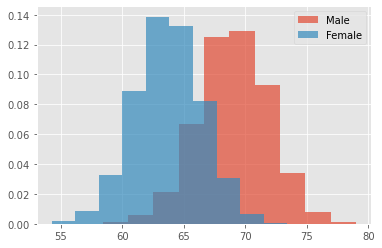

In [3]:
# Your code here
# male_df.Height.plot.hist(bins=10, density=True, alpha=0.7, label="Male Height")
# female_df.Height.plot.hist(bins=10, density=True, alpha=0.7, label='Female Height')

plt.hist(male_df.Height, bins=10, density=True, alpha=0.7, label='Male')
plt.hist(female_df.Height, bins=10, density=True, alpha=0.7, label='Female')
plt.legend()

In [4]:
# Record your observations - are these inline with your personal observations?


## Create a density function using interpolation


- Write a density function density() that uses interpolation and takes in a random variable
- Use `np.histogram()`
- The function should return two lists carrying x and y coordinates for plotting the density function

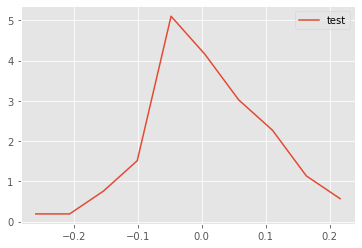

In [5]:
def density(x):
    n, bins = np.histogram(x, density=True)
    return (bins[:-1]+bins[1:])/2, n    


# Generate test data and test the function - uncomment to run the test
np.random.seed(5)
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 100)
x, y = density(s)
plt.plot(x, y, label='test')
plt.legend()

## Add overlapping density plots to the histograms plotted earlier

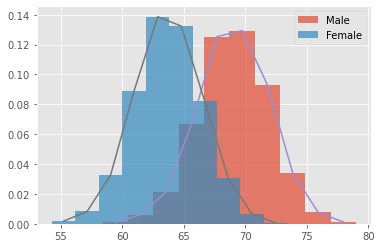

In [6]:
# Your code here
male_df.Height.hist(bins=10, density=True, alpha=0.7, label='Male')
female_df.Height.hist(bins=10, density=True, alpha=0.7, label='Female')

mx, my = density(male_df.Height)
fx, fy = density(female_df.Height)
plt.plot(mx, my)
plt.plot(fx, fy)
plt.legend()

## Repeat the above exercise for male and female weights

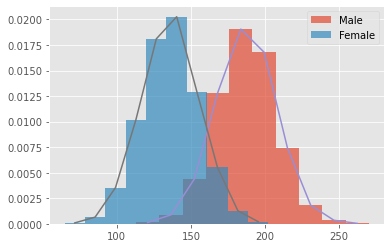

In [7]:
# Your code here 
male_df.Weight.hist(bins=10, density=True, alpha=0.7, label='Male')
female_df.Weight.hist(bins=10, density=True, alpha=0.7, label='Female')

mx, my = density(male_df.Weight)
fx, fy = density(female_df.Weight)
plt.plot(mx, my)
plt.plot(fx, fy)
plt.legend()

## Write your observations in the cell below

In [8]:
# Record your observations - are these inline with your personal observations?


# What is the takeaway when comparing male and female heights and weights?

## Repeat the above experiments in seaborn and compare with your results

Text(0.5, 1.0, 'Comparing Heights')

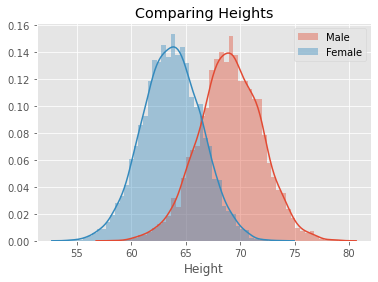

In [9]:
# Code for heights here
import seaborn as sns

sns.distplot(male_df.Height)
sns.distplot(female_df.Height)
plt.legend(['Male', 'Female'])
plt.title('Comparing Heights')

Text(0.5, 1.0, 'Comparing Weights')

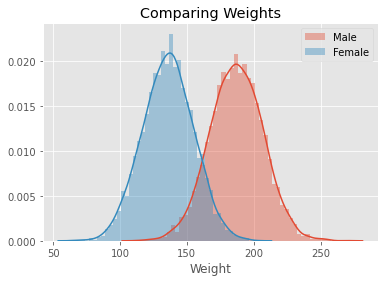

In [10]:
# Code for weights here
sns.distplot(male_df.Weight)
sns.distplot(female_df.Weight)
plt.legend(['Male', 'Female'])
plt.title('Comparing Weights')

In [11]:
# Your comments on the two approaches here. 
# are they similar? what makes them different if they are?

## Summary

In this lesson, you learned how to build the probability density curves visually for a given dataset and compare the distributions visually by looking at the spread, center, and overlap. This is a useful EDA technique and can be used to answer some initial questions before embarking on a complex analytics journey.